In [2]:
# XP Exercises - Inferential statistics with regression

#As stated in the instructions, please complete the code when you see a "##TODO"


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_1samp


## TODO : load the dataset in a dataframe called d1, that you can find here : https://www.kaggle.com/code/youssefelzahar/inferential-statistics/input?select=air+traffic.csv


In [4]:
d1=pd.read_csv('air traffic.csv')

# Columns Description

* Dom_Pax : Domestic Air Travel Passengers
* Int_Pax : International Air Travel Passengers
* Pax : Total Air Travel Passengers
* Dom_Flt : Number of Flights (Domestic)
* Int_Flt : Number of Flights (International)
* Flt : Number of Flights (Total)
* Dom_RPM : Revenue Passenger-miles (Domestic)
* Int_RPM : Revenue Passenger-miles (International)


## TODO: Check the summary of the DataFrame to see its structure and data types.


In [5]:
print(d1.head())
print(d1.info())
print(d1.describe())

   Year  Month     Dom_Pax    Int_Pax         Pax  Dom_Flt Int_Flt      Flt  \
0  2003      1  43,032,450  4,905,830  47,938,280  785,160  57,667  842,827   
1  2003      2  41,166,780  4,245,366  45,412,146  690,351  51,259  741,610   
2  2003      3  49,992,700  5,008,613  55,001,313  797,194  58,926  856,120   
3  2003      4  47,033,260  4,345,444  51,378,704  766,260  55,005  821,265   
4  2003      5  49,152,352  4,610,834  53,763,186  789,397  55,265  844,662   

      Dom_RPM     Int_RPM         RPM     Dom_ASM     Int_ASM         ASM  \
0  36,211,422  12,885,980  49,097,402  56,191,300  17,968,572  74,159,872   
1  34,148,439  10,715,468  44,863,907  50,088,434  15,587,880  65,676,314   
2  41,774,564  12,567,068  54,341,633  57,592,901  17,753,174  75,346,075   
3  39,465,980  10,370,592  49,836,572  54,639,679  15,528,761  70,168,440   
4  41,001,934  11,575,026  52,576,960  55,349,897  15,629,821  70,979,718   

   Dom_LF  Int_LF     LF  
0   64.44   71.71  66.20  
1   68.1

# Inferential statistics

We will perform the following :

1. Linear Regression

2. Hypothesis testing



# Linear and Multiple Regression

The best linear line describe the correlation between two variables.

We have two types:

1. linear Regression
2. Multiple Regression

The equation of regression

**w=a+(b*x)**

**w=predict variable**(The point of intersection of the x axis and the y axis)

**a=intercept**(The point of intersection of the regression and the y axis)

**b=slope**(The amount of increase in regression relative to the x-axis)


In [6]:
# Linear Regression


## TODO: Explore the relationship between domestic passengers and domestic flights.
## TODO: Perform a linear regression between domestic passengers and domestic flights, and create a prediction model.
## TODO: Plot the scatter plot of domestic passengers versus domestic flights, and overlay the linear regression line.
## TODO: Print the slope, intercept, p-value, standard error, and the predicted value for 100 domestic passengers.



#**relationship between domestic passengers and domestic flights.**

# **Deleting the ',' and converting number to floats for correct statistics calculations:**

In [7]:
d1['Dom_Pax'] = d1['Dom_Pax'].str.replace(',', '').astype(float)
d1['Dom_Flt'] = d1['Dom_Flt'].str.replace(',', '').astype(float)
print(d1['Dom_Pax'].corr(d1['Dom_Flt']))

0.5369864170525395


# **We can observe a moderate and positive correlation between this variables, which means that when domestic flights increase, domestic passenger also but in smaller proportion**

In [8]:
from sklearn.linear_model import LinearRegression
X = d1[['Dom_Flt']]
y = d1['Dom_Pax']

model = LinearRegression()
model.fit(X, y)

# r²
r2 = model.score(X, y)
print(f'(r²): {r2}')


(r²): 0.28835441209892376


# **r shows as there is a weak relation between both columns, only 28% of domestic passenger can be explained by number of domestic flight. If there would be a perfect relationship it would be 1. The rest (72%) could be explained by some other facts but not by the domestic flights**

# **linear regression between domestic passengers and domestic flights**

# **scatter plot of domestic passengers versus domestic flights, and overlay the linear regression line.**

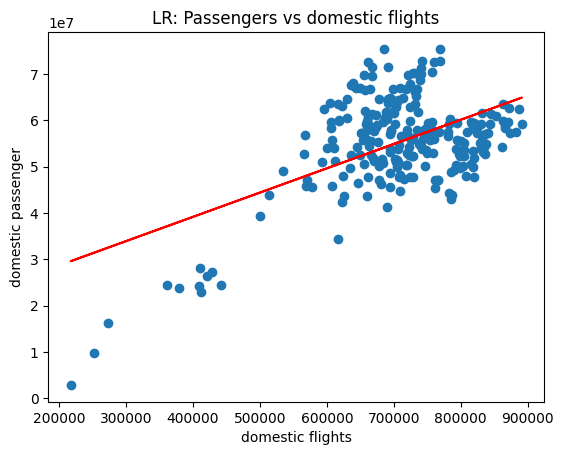

Slope: 52.36968067151541
Intercept: 18197400.870412596


In [9]:
# LR
X = d1[['Dom_Flt']]
y = d1['Dom_Pax']

model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='red')
plt.xlabel('domestic flights')
plt.ylabel('domestic passenger')
plt.title('LR: Passengers vs domestic flights')
plt.show()

print(f'Slope: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')


# **For every increase in 1 in domestic flight, passenger increase in 52.37. Intercept is that if x (domestic flights) is 0, the number of passengers will be 18.19 millions**

# **predicted value for 100 domestic passengers.**

In [11]:
pred_100 = model.predict([[100]])

residuals = y - predictions
std_err = np.std(residuals)

print(f'Pred: {pred_100[0]}')
print(f'standard error: {std_err}')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(d1[['Dom_Flt']])

new_value = np.array([[100]])
new_value_scaled = scaler.transform(new_value)
prediction = model.predict(new_value_scaled)

print(f"Prediction for 100 domestic flights (adjusted): {prediction[0]:,.0f} passengers")


Pred: 18202637.838479746
standard error: 8789850.99540281
Prediction for 100 domestic flights (adjusted): 18,197,054 passengers


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **We can observe a very uncertain prediction due to the standard error**

# **Print r2**

In [12]:
r2 = model.score(X, y)
print('r²:', r2)

r²: 0.28835441209892376


## **Prepare the data X and è for regression by reshaping the features using .reshape(-1,1)**

In [13]:
X = d1['Dom_Flt'].values.reshape(-1, 1)
y = d1['Dom_Pax'].values


# **Split the data into training and validation sets.**

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# **Fit the linear regression model, make a prediction, and evaluate the model.**

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 82041048700668.08


# **This value is very high, so we can see this model is not very precise, we could Standarize the data, or normalize it, I am going to use standard Scaler for next point**

# **Calculate the mean squared error (MSE) for the training set.**

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

X = d1[['Dom_Flt']].values
y = d1['Dom_Pax'].values.reshape(-1, 1)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

print(f'MSE (Training): {mse_train}')
print(f'MSE (Validation): {mse_val}')

mse_train_original = mean_squared_error(scaler_y.inverse_transform(y_train), scaler_y.inverse_transform(y_train_pred))
mse_val_original = mean_squared_error(scaler_y.inverse_transform(y_val), scaler_y.inverse_transform(y_val_pred))

print(f'MSE in the original scale (Training): {mse_train_original}')
print(f'MSE in the original scale (Validation): {mse_val_original}')


MSE (Training): 0.7024403130218403
MSE (Validation): 0.7556695773963159
MSE in the original scale (Training): 76262088158292.33
MSE in the original scale (Validation): 82041048700668.1


# **Both errors (training and validation) are high, which means the model is not overfitted, but doesnt predict with accuracy.**

# **## (Optional) TODO: Perform hypothesis testing for two variables of your choice**

# **1 sample**

In [17]:
popmean = d1['Year'].mean()

sample = np.random.choice(d1['Year'], 50)

ttest, p_value = ttest_1samp(sample, popmean)

print("t-statistic:", ttest)
print("p-value:", p_value)

if p_value <= 0.05:
    print("Reject null hypothesis: The mean is significantly different from the population mean.")
else:
    print("Fail to reject null hypothesis: No significant difference from the population mean.")


t-statistic: -0.2693383732676371
p-value: 0.7888002624013606
Fail to reject null hypothesis: No significant difference from the population mean.


#**P is greater than ttstats which means there is not enough evidence to reject the null hypothesis. This means that the mean of the sample is not very different from the data. With this we can say that the sample we took is representative of the data we are analyzing.**

# **2 samples**

In [18]:
from scipy.stats import ttest_ind

d1['Flt'] = d1['Flt'].str.replace(',', '').astype(float)

sample_a = np.random.choice(d1['Flt'], 50)
sample_b = np.random.choice(d1['Dom_Pax'], 50)

t_stat, p_val = ttest_ind(sample_a, sample_b)

print("t-statistic:", t_stat)
print("p-value:", p_val)

if p_val <= 0.05:
    print("Reject null hypothesis: The means are significantly different.")
else:
    print("Fail to reject null hypothesis: No significant difference in the means.")

t-statistic: -50.22521542311051
p-value: 9.593866901124848e-72
Reject null hypothesis: The means are significantly different.


# **We can observe that the groups dont have the same distribution. There is a very big difference between their means.**